In [ ]:
!pip install -q kaggle

In [ ]:

# upload kaggle credential (kaggle.json)
from google.colab import files
files.upload()



Saving kaggle.json to kaggle.json


{'kaggle.json': b'{ "username": "wenwenwenwenw", "key": "ba74888bb5b6eb5ec461d28c0ab90d84" }\n'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d andradaolteanu/gtzan-dataset-music-genre-classification

 99% 1.20G/1.21G [00:13<00:00, 96.8MB/s]
100% 1.21G/1.21G [00:13<00:00, 97.7MB/s]


In [ ]:
!unzip to folder
!mkdir Data
!unzip gtzan-dataset-music-genre-classification.zip -d /content

Set Up

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import librosa, IPython

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data representation

**Load Data and plot wave graph**

In [ ]:
audio_sample = './Data/genres_original/jazz/jazz.00000.wav'
audio_data, sr = librosa.load(audio_sample)
audio_data, _ = librosa.effects.trim(audio_data)

In [ ]:
# play sample data
IPython.display.Audio(audio_data, rate=sr)

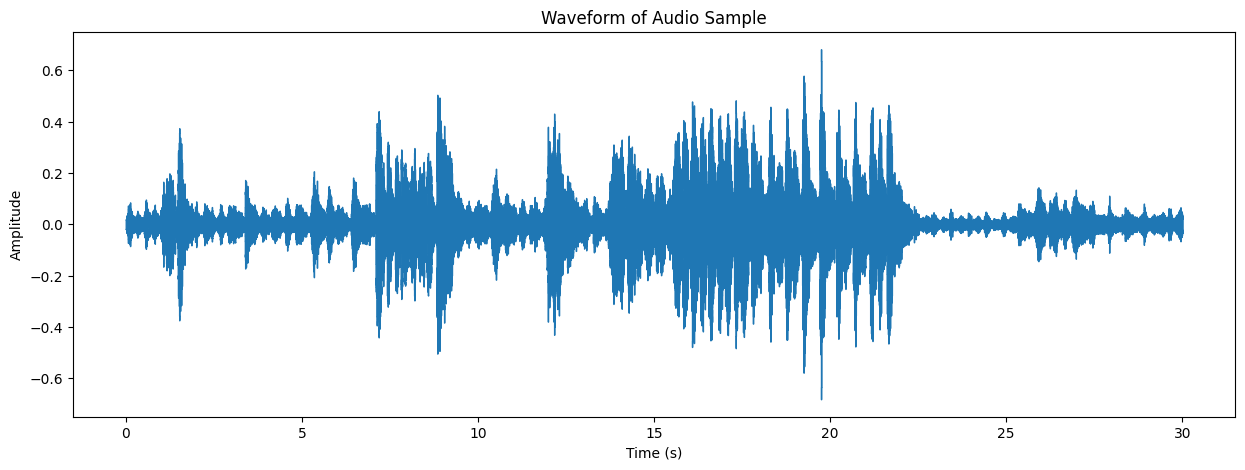

In [ ]:
# plot sample file
plt.figure(figsize=(15,5))
librosa.display.waveshow(audio_data)
plt.title("Waveform of Audio Sample")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

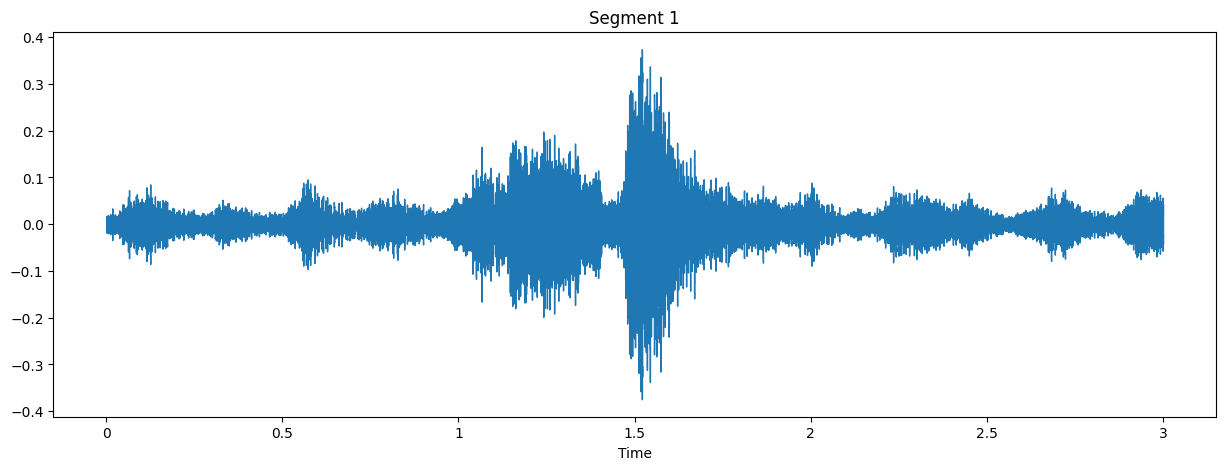

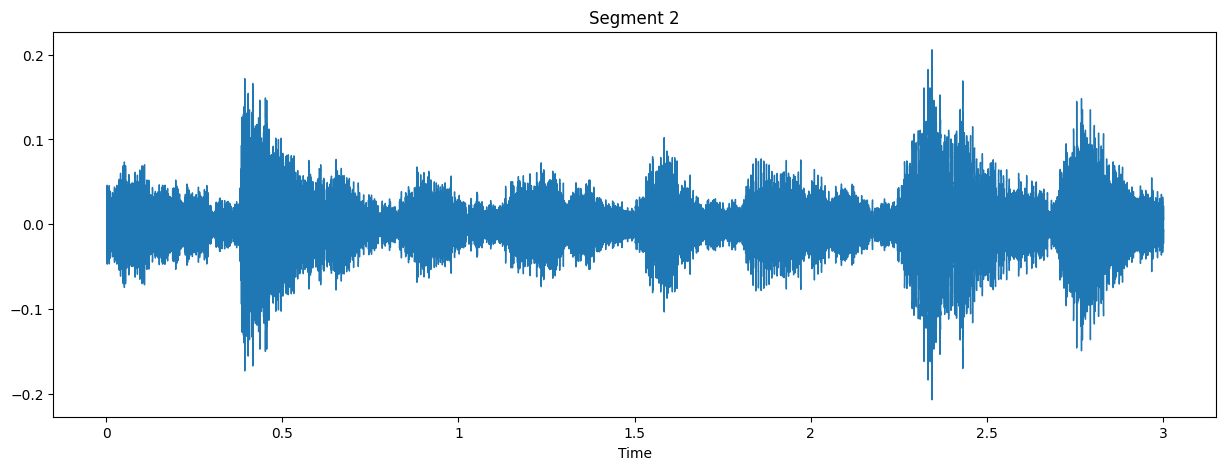

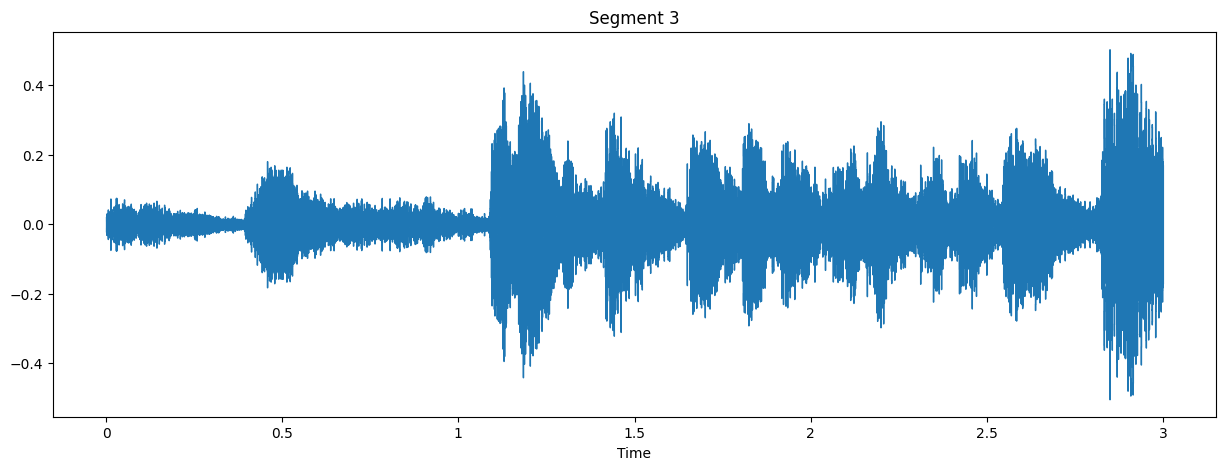

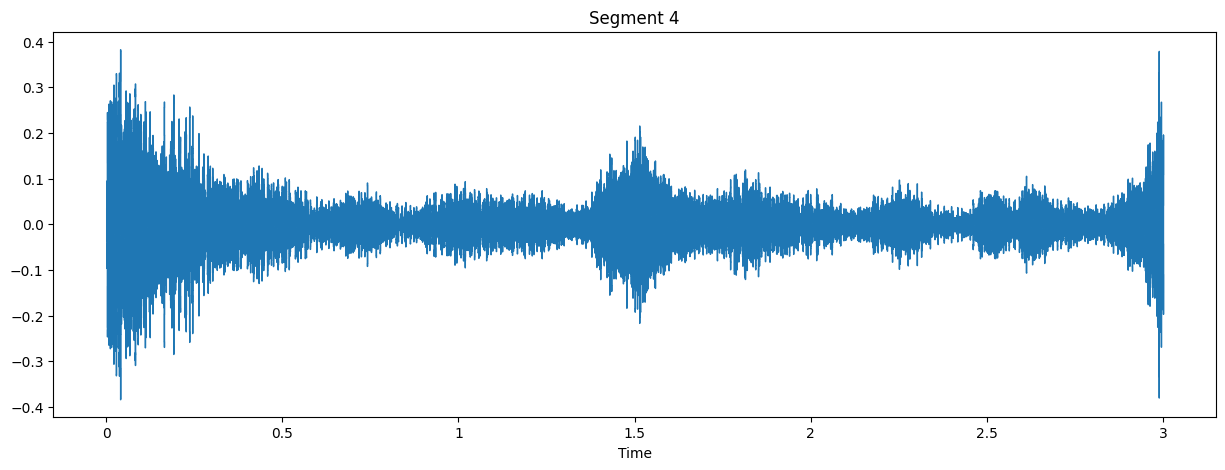

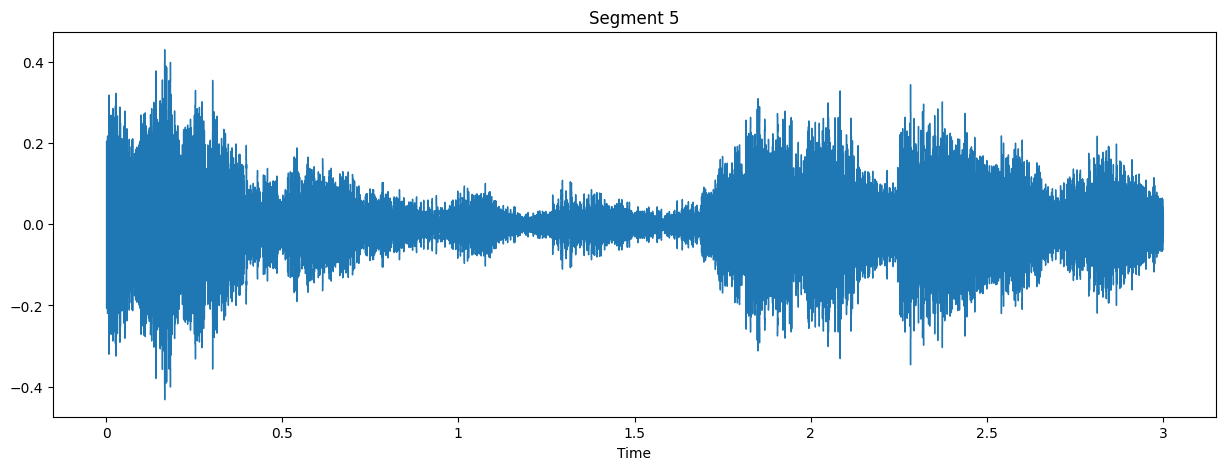

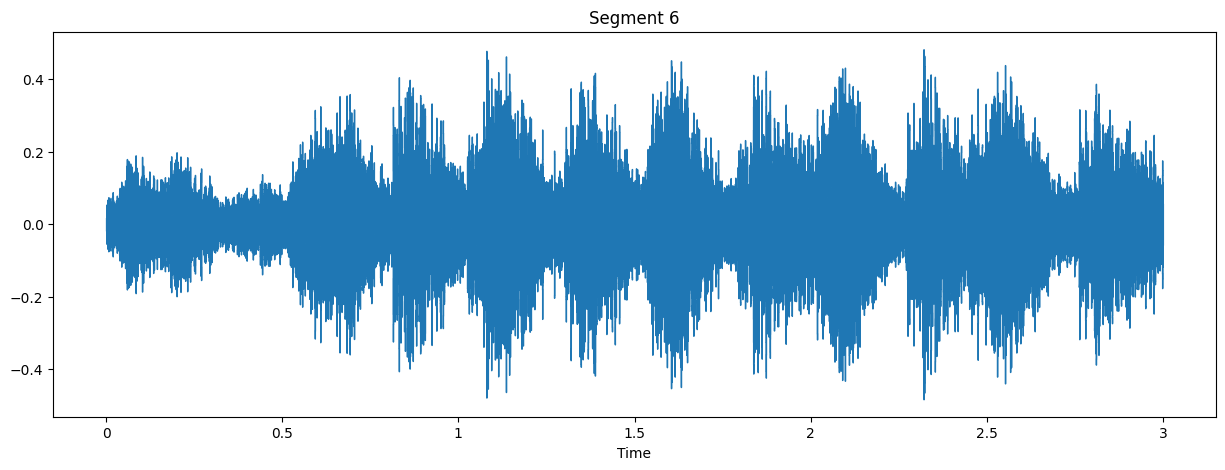

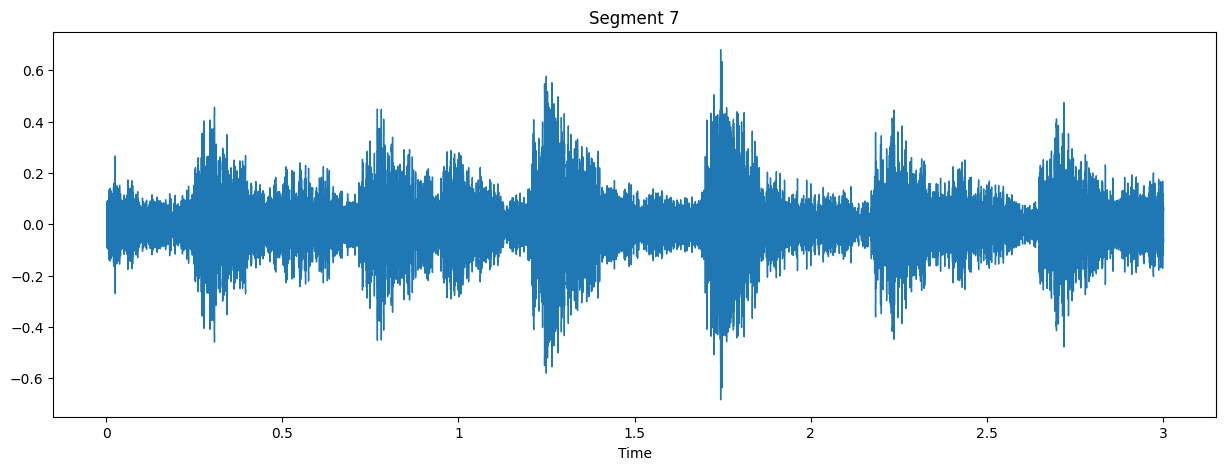

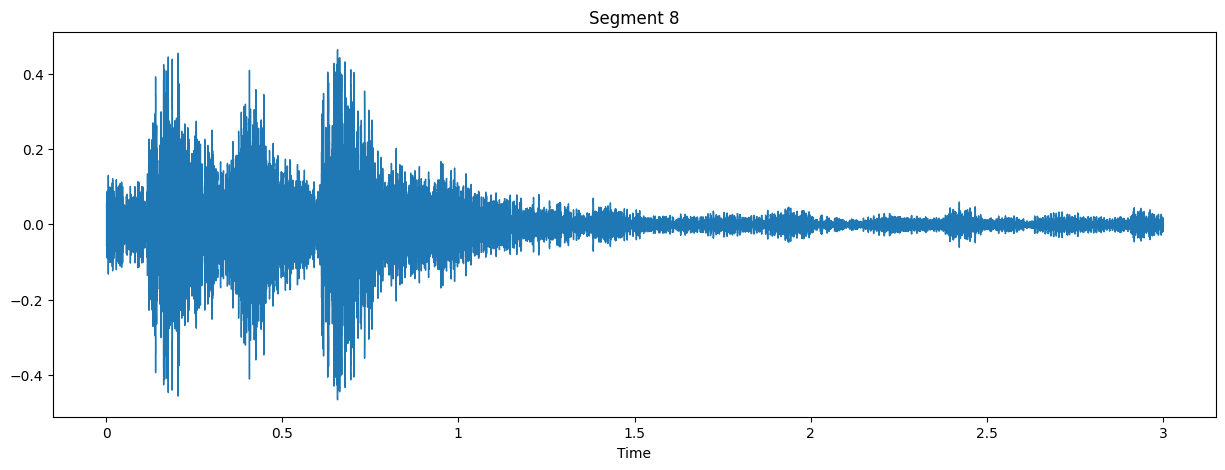

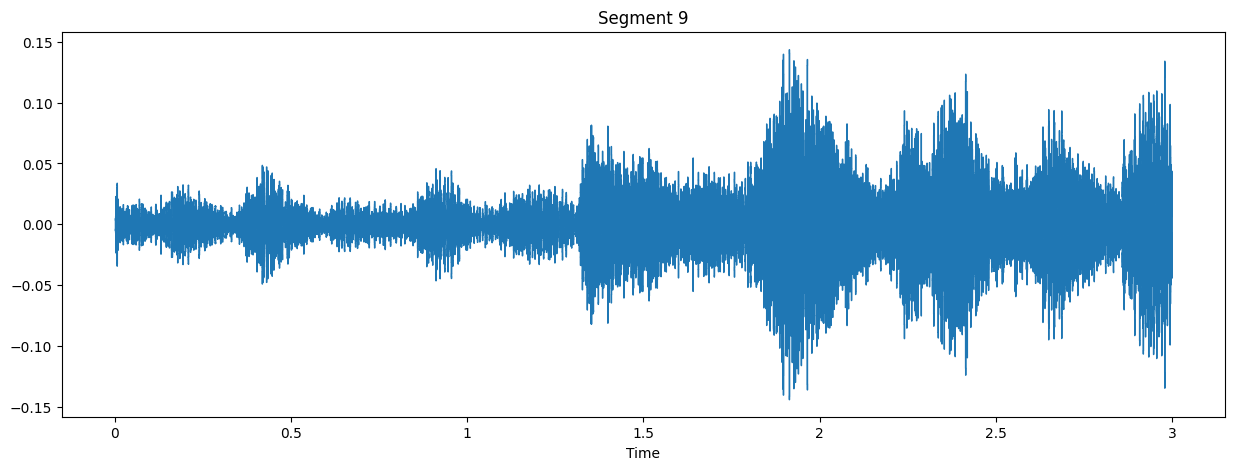

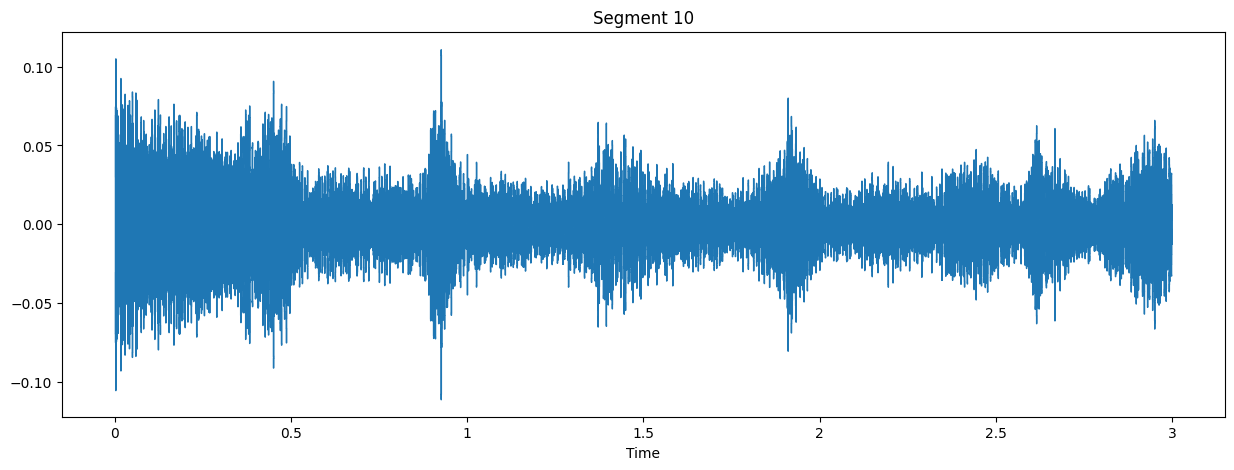

In [ ]:
# Slice the audio into 3-second segments
segment_length = 3 * sr  # 3 seconds * samples per second

# Calculate the total number of segments
num_segments = int(len(audio_data) / segment_length)

# Loop through and plot the waveform for each segment
for i in range(num_segments):
    start_sample = i * segment_length  # start of the segment
    end_sample = start_sample + segment_length  # end of the segment

    # Plot the waveform
    plt.figure(figsize=(15, 5))
    librosa.display.waveshow(audio_data[start_sample:end_sample], sr=sr)
    plt.title(f"Segment {i+1}")
    plt.show()

In [ ]:
import os
classes = [a for a in os.listdir('Data/wave') if '.' not in a]
print(classes)

['blues', 'jazz', 'wave', 'rock', 'disco', 'reggae', 'metal', 'country', 'pop', 'hiphop', 'classical']


In [ ]:
def yield_file_name(full_path, graph_style, i):
  file_name = full_path.split('/')[-1]
  splited_file_name = file_name.split('.')
  path = ".".join(splited_file_name[:-1]) + "." + f"{i}." + 'png'

  return f"./Data/{graph_style}/test/{splited_file_name[0]}/" + path

In [ ]:
print(yield_file_name('./Data/genres_original/jazz/jazz.00000.wav)', 'wave', 0))

./Data/genres_original/jazz/jazz.00000.wav) disco 0
./Data/wave/test/jazz/jazz.00000.0.png


In [ ]:

# for class_name in classes:
#skip: jazz.54
# completed: reggae, jazz, disco, rock, pop
class_name = 'country'
# for class_name in classes:
for i in range(48, 100):
  audio_sample = f'./Data/genres_original/{class_name}/{class_name}.{i:05}.wav'
  audio_data, sr = librosa.load(audio_sample)
  audio_data, _ = librosa.effects.trim(audio_data)

  # Slice the audio into 3-second segments
  segment_length = 3 * sr  # 3 seconds * samples per second

  # Calculate the total number of segments
  num_segments = int(len(audio_data) / segment_length)

  # Loop through and plot the waveform for each segment
  for i in range(num_segments):
      start_sample = i * segment_length  # start of the segment
      end_sample = start_sample + segment_length  # end of the segment

      # Plot the waveform
      plt.figure(figsize=(15, 5))
      librosa.display.waveshow(audio_data[start_sample:end_sample], sr=sr)

      plt.savefig(yield_file_name(audio_sample, 'wave', i))
      plt.close()

In [ ]:
#!cp -r Data/wave/test/country/* /content/drive/MyDrive/cs682_final_genre_classification/Data/test/country/

In [ ]:
audio_sample = './Data/genres_original/jazz/jazz.00000.wav'
audio_data, sr = librosa.load(audio_sample)
audio_data, _ = librosa.effects.trim(audio_data)

chroma = librosa.feature.chroma_stft(audio_data, sr=sr)
plt.figure(figsize=(16,6))
lplt.specshow(chroma, sr=sr, x_axis='time', y_axis='chroma', cmap='coolwarm')
plt.colorbar()
plt.title("Chroma Features")
plt.show()

Converting an audio signal to a spectrogram by Short-Time Fourier Transform (STFT)

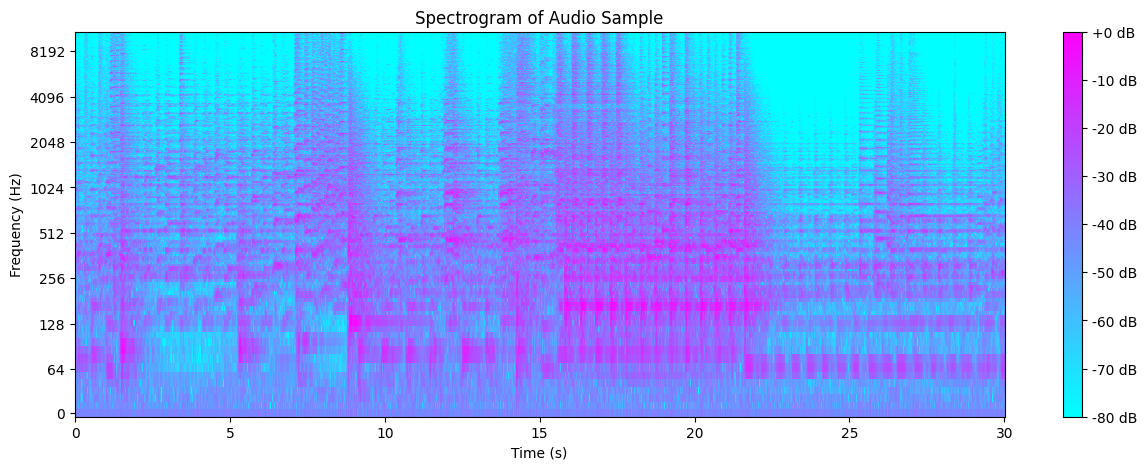

In [ ]:
# Perform Short-Time Fourier Transform (STFT)
D = librosa.stft(audio_data)

# Convert amplitude to decibels
D_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

# Plot the Spectrogram
plt.figure(figsize=(15, 5))
librosa.display.specshow(D_db, sr=sr, x_axis='time', y_axis='log', cmap='cool')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram of Audio Sample')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()

In [ ]:
 for i in range(num_segments):
    start_sample = i * segment_length  # start of the segment
    end_sample = start_sample + segment_length  # end of the segment

    seg = audio_data[start_sample:end_sample]

    chroma = librosa.feature.chroma_stft(seg, sr=sr)
    chroma = librosa.feature.chroma_stft


In [ ]:
# spectrogram


for class_name in ["classical"]:
  # class_name = 'country'
  # for class_name in classes:
  for i in range(100):
    audio_sample = f'./Data/genres_original/{class_name}/{class_name}.{i:05}.wav'
    audio_data, sr = librosa.load(audio_sample)
    audio_data, _ = librosa.effects.trim(audio_data)

    # Slice the audio into 3-second segments
    segment_length = 3 * sr  # 3 seconds * samples per second

    # Calculate the total number of segments
    num_segments = int(len(audio_data) / segment_length)

    # Loop through and plot the waveform for each segment
    for i in range(num_segments):
      start_sample = i * segment_length  # start of the segment
      end_sample = start_sample + segment_length  # end of the segment

      seg = audio_data[start_sample:end_sample]

      # Perform Short-Time Fourier Transform (STFT)
      D = librosa.stft(seg)

      # Convert amplitude to decibels
      D_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

      # Plot the Spectrogram
      plt.figure(figsize=(15, 5))
      librosa.display.specshow(D_db, sr=sr, x_axis='time', y_axis='log', cmap='cool')



      plt.savefig(yield_file_name(audio_sample, 'spectrogram', i))


      plt.close()


In [ ]:
# chroma


for class_name in ["jazz", "metal", "pop", "reggae", "rock"]:
  # class_name = 'country'
  # for class_name in classes:
  for i in range(100):
    if class_name == "jazz":
      if i <= 54:
        continue
    audio_sample = f'./Data/genres_original/{class_name}/{class_name}.{i:05}.wav'
    audio_data, sr = librosa.load(audio_sample)
    audio_data, _ = librosa.effects.trim(audio_data)

    # Slice the audio into 3-second segments
    segment_length = 3 * sr  # 3 seconds * samples per second

    # Calculate the total number of segments
    num_segments = int(len(audio_data) / segment_length)

    # Loop through and plot the waveform for each segment
    for i in range(num_segments):
      start_sample = i * segment_length  # start of the segment
      end_sample = start_sample + segment_length  # end of the segment

      seg = audio_data[start_sample:end_sample]


      stft = np.abs(librosa.stft(seg))
      chroma = librosa.feature.chroma_stft(S=stft, sr=sr)

      # Convert amplitude to decibels
      plt.figure(figsize=(15, 5))
      librosa.display.specshow(chroma, sr=sr, x_axis='time', y_axis='chroma', cmap='coolwarm')
      plt.savefig(yield_file_name(audio_sample, 'chroma', i))
      plt.close()


In [ ]:
!pip3 install Cython


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader, Dataset
import os
import numpy as np
import cv2
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt



# Define the same labels and image size
LABELS = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
IMG_SIZE = 256

In [ ]:

# Define cnn model
class MusicGenreModel(nn.Module):
    def __init__(self):
        super(MusicGenreModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.fc1 = nn.Linear(64 * (IMG_SIZE // 4) * (IMG_SIZE // 4), 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * (IMG_SIZE // 4) * (IMG_SIZE // 4))
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x


In [ ]:
# Define a custom dataset class for your data
class MusicGenreDataset(Dataset):
    def __init__(self, img_paths, transform=None):
        self.data = self.get_data(img_paths)
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        image, label = self.data[idx]
        if self.transform:
            image = self.transform(image)
        return image, label

    def get_data(self, paths):
        data = []
        for index, path in enumerate(paths):
            print(f"now reading in: {index + 1}/{len(paths)}")
            label_index = LABELS.index(path.split("/")[-2])
            try:
                img_arr = cv2.imread(path)[...,::-1]  # Convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))  # Reshaping images to preferred size
                data.append([resized_arr, label_index])
            except Exception as e:
                print(e)
        return data


In [ ]:
import os
import random
from glob import glob
from sklearn.model_selection import train_test_split
from shutil import copyfile


def get_png_file_paths(dir):
  image_paths = []
  for l in labels:
    image_paths += glob(os.path.join(data_dir + f"/{l}", '*.png'))

  return image_paths

In [ ]:

def split_dataset(image_paths):
  # Step 1: Calculate the total number of images
  total_images = len(image_paths)

  # Step 2: Calculate the number of images for each split
  train_ratio = 0.6
  val_ratio = 0.3
  test_ratio = 0.1

  num_train = int(total_images * train_ratio)
  num_val = int(total_images * val_ratio)
  num_test = int(total_images * test_ratio)

  # Step 3: Randomly shuffle the list of file paths
  random.shuffle(image_paths)

  # Step 4: Split the shuffled list of file paths
  image_paths_train = image_paths[:num_train]
  image_paths_val = image_paths[num_train:num_train + num_val]
  image_paths_test = image_paths[num_train + num_val:]


  return image_paths_train, image_paths_val, image_paths_test

In [ ]:
data_dir = 'drive/MyDrive/Data/spectrogram/test'

image_paths = get_png_file_paths(data_dir)
train, val, test = split_dataset(image_paths)

In [ ]:
len(test)

998

In [ ]:
# transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
test_dataset = MusicGenreDataset(test)

In [ ]:
test_dataset.__class__

__main__.MusicGenreDataset

**Learning rate tuning**

In [ ]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

test_dataset = MusicGenreDataset(test, transform)
train_dataset = MusicGenreDataset(train, transform)
val_dataset = MusicGenreDataset(val, transform)

In [ ]:
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

In [ ]:
### use Mac GPU by MPS
if not torch.backends.mps.is_available():
    if not torch.backends.mps.is_built():
        print("MPS not available because the current PyTorch install was not "
              "built with MPS enabled.")
    else:
        print("MPS not available because the current MacOS version is not 12.3+ "
              "and/or you do not have an MPS-enabled device on this machine.")

else:
    device = torch.device("mps")

In [ ]:
for lr in [0.005, 0.001, 0.0005, 0.0001, 0.00005]:
    # Create an instance of the model (same as before)
    model = MusicGenreModel().to(device)


    # Define the loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    # Training loop
    num_epochs = 100
    train_losses = []
    val_losses = []
    train_acc = []
    val_acc = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()
            running_loss += loss.item()

        train_loss = running_loss / len(train_loader)
        train_accuracy = 100 * correct_train / total_train
        train_losses.append(train_loss)
        train_acc.append(train_accuracy)

        # Validation loop
        model.eval()
        running_loss = 0.0
        correct_val = 0
        total_val = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                _, predicted = torch.max(outputs.data, 1)
                total_val += labels.size(0)
                correct_val += (predicted == labels).sum().item()
                running_loss += loss.item()

        val_loss = running_loss / len(val_loader)
        val_accuracy = 100 * correct_val / total_val
        val_losses.append(val_loss)
        val_acc.append(val_accuracy)

        print(f'Epoch [{epoch + 1}/{num_epochs}] - Train Loss: {train_loss:.4f} - Train Acc: {train_accuracy:.2f}% - Val Loss: {val_loss:.4f} - Val Acc: {val_accuracy:.2f}%')

        # Save the model's weights every 30 epochs
        if (epoch + 1) % 30 == 0:
            checkpoint_name = f'model_checkpoint_epoch{epoch + 1}.pth'
            torch.save(model.cpu().state_dict(), checkpoint_name)
            model.to(device)  # Move the model back to the GPU

    # Save the model's weights
    torch.save(model.state_dict(), f'wave_CNN_epoch_{lr}_lr.pth')
    # Save training history
    history = {'train_loss': train_losses, 'val_loss': val_losses, 'train_acc': train_acc, 'val_acc': val_acc}
    torch.save(history, f'history_wave_CNN_epoch_{lr}_lr.pth')

    history = torch.load(f'history_wave_CNN_epoch_{lr}_lr.pth')

    plt.figure(figsize=(10, 5))
    plt.plot(history['train_loss'], label='Train Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.savefig(f'wave_CNN_acc_plot_{lr}.png')
    plt.show()


    plt.figure(figsize=(10, 5))
    plt.plot(history['train_acc'], label='Train Accuracy')
    plt.plot(history['val_acc'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.savefig(f'wave_CNN_loss_plot_{lr}.png')
    plt.show()

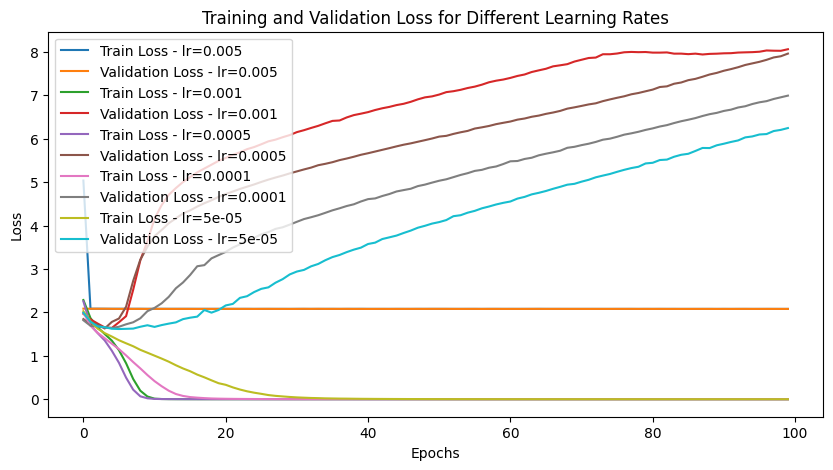

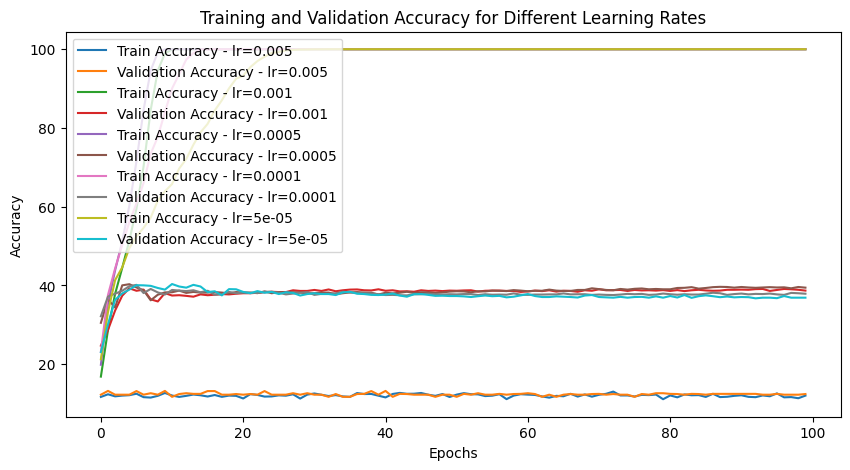

In [25]:
import matplotlib.pyplot as plt
import torch

learning_rates = [0.005, 0.001, 0.0005, 0.0001, 0.00005]

plt.figure(figsize=(10, 5))
for lr in learning_rates:
    history = torch.load(f'history_wave_CNN_epoch_{lr}_lr.pth')

    plt.plot(history['train_loss'], label=f'Train Loss - lr={lr}')
    plt.plot(history['val_loss'], label=f'Validation Loss - lr={lr}')

plt.title('Training and Validation Loss for Different Learning Rates')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig(f'Training and Validation Loss for Different Learning Rates.png')
plt.show()

plt.figure(figsize=(10, 5))
for lr in learning_rates:
    history = torch.load(f'history_wave_CNN_epoch_{lr}_lr.pth')

    plt.plot(history['train_acc'], label=f'Train Accuracy - lr={lr}')
    plt.plot(history['val_acc'], label=f'Validation Accuracy - lr={lr}')

plt.title('Training and Validation Accuracy for Different Learning Rates')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig(f'Training and Validation Accuracy for Different Learning Rates.png')
plt.show()

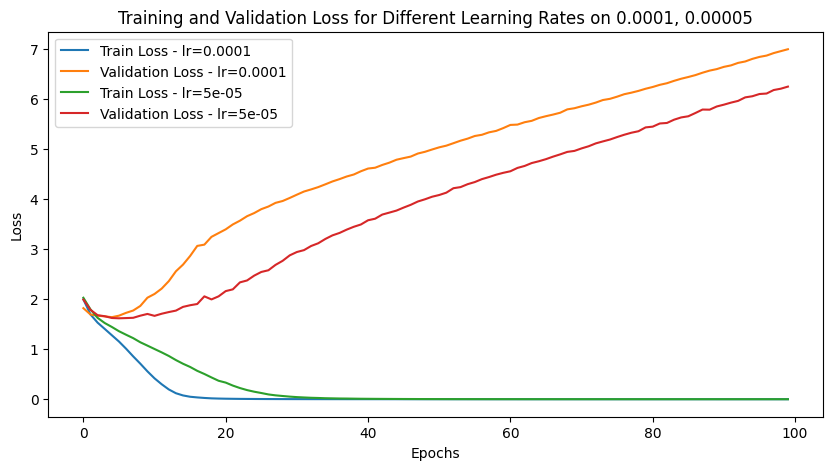

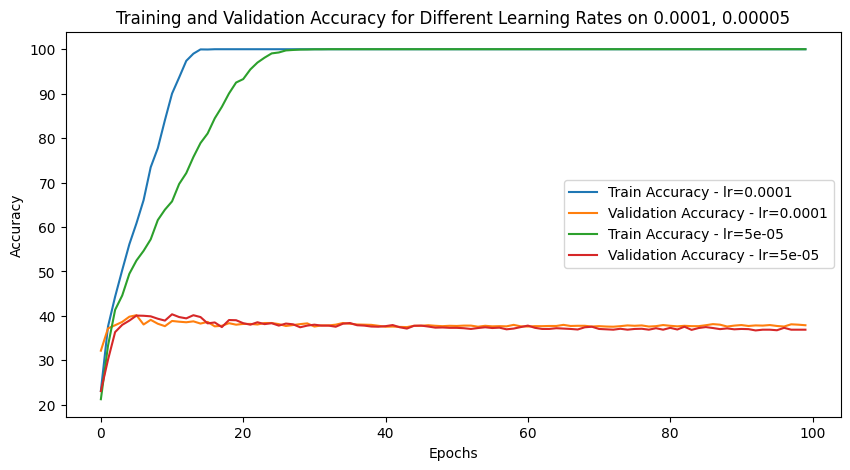

In [24]:
import matplotlib.pyplot as plt
import torch

learning_rates = [0.0001, 0.00005]

plt.figure(figsize=(10, 5))
for lr in learning_rates:
    history = torch.load(f'history_wave_CNN_epoch_{lr}_lr.pth')

    plt.plot(history['train_loss'], label=f'Train Loss - lr={lr}')
    plt.plot(history['val_loss'], label=f'Validation Loss - lr={lr}')

plt.title('Training and Validation Loss for Different Learning Rates on 0.0001, 0.00005')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig(f'Training and Validation Loss for Different Learning Rates on 0.0001, 0.00005.png')
plt.show()

plt.figure(figsize=(10, 5))
for lr in learning_rates:
    history = torch.load(f'history_wave_CNN_epoch_{lr}_lr.pth')

    plt.plot(history['train_acc'], label=f'Train Accuracy - lr={lr}')
    plt.plot(history['val_acc'], label=f'Validation Accuracy - lr={lr}')

plt.title('Training and Validation Accuracy for Different Learning Rates on 0.0001, 0.00005')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig(f'Training and Validation Accuracy for Different Learning Rates on 0.0001, 0.00005.png')
plt.show()

In [ ]:

# Define a data transformation to normalize the data (same as before)
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# Create train and validation datasets (same as before)
train_dataset = MusicGenreDataset('spectrogram/train', transform=transform)
val_dataset = MusicGenreDataset('spectrogram/test', transform=transform)

# Create data loaders for training and validation (same as before)
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Create an instance of the model (same as before)
model = MusicGenreModel()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Training loop
num_epochs = 500
train_losses = []
val_losses = []
train_acc = []
val_acc = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()
        running_loss += loss.item()

    train_loss = running_loss / len(train_loader)
    train_accuracy = 100 * correct_train / total_train
    train_losses.append(train_loss)
    train_acc.append(train_accuracy)

    # Validation loop
    model.eval()
    running_loss = 0.0
    correct_val = 0
    total_val = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()
            running_loss += loss.item()

    val_loss = running_loss / len(val_loader)
    val_accuracy = 100 * correct_val / total_val
    val_losses.append(val_loss)
    val_acc.append(val_accuracy)

    print(f'Epoch [{epoch + 1}/{num_epochs}] - Train Loss: {train_loss:.4f} - Train Acc: {train_accuracy:.2f}% - Val Loss: {val_loss:.4f} - Val Acc: {val_accuracy:.2f}%')

# Save the model's weights
torch.save(model.state_dict(), '500_epoch_simple_lr.pth')

# Save training history
history = {'train_loss': train_losses, 'val_loss': val_losses, 'train_acc': train_acc, 'val_acc': val_acc}
torch.save(history, 'history_500_epoch_simple.pth')

# Plot training and validation loss and accuracy (same as before)
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(range(num_epochs), train_losses, label='Training Loss', c='#4CAF50', linewidth=4)
plt.plot(range(num_epochs), val_losses, label='Validation Loss', c='red', linewidth=4)
plt.legend()
plt.title('Training and Validation Loss', fontsize=18)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Loss', fontsize=18)

plt.subplot(1, 2, 2)
plt.plot(range(num_epochs), train_acc, label='Training Accuracy', c='#4CAF50', linewidth=4)
plt.plot(range(num_epochs), val_acc, label='Validation Accuracy', c='red', linewidth=4)
plt.legend()
plt.title('Training and Validation Accuracy', fontsize=18)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Accuracy', fontsize=18)

plt.tight_layout()
plt.savefig('pytorch_training_plot.png', bbox_inches='tight')
plt.clf()

# Load the saved model
model.load_state_dict(torch.load('500_epoch_simple_lr.pth'))

# Evaluate the model on the validation data
model.eval()
val_predictions = []
val_labels = []

with torch.no_grad():
    for inputs, labels in val_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        val_predictions.extend(predicted.cpu().numpy())
        val_labels.extend(labels.cpu().numpy())

val_predictions = np.array(val_predictions)
val_labels = np.array(val_labels)

# Print classification report (same as before)
print(classification_report(val_labels, val_predictions, target_names=labels))

# Plot confusion matrix (same as before)
cm1 = confusion_matrix(val_labels, val_predictions)
df_cm = pd.DataFrame(cm1, index=labels, columns=labels)
plt.figure(figsize=(10, 7))
sn.heatmap(df_cm, annot=True, cmap="RdPu")
plt.savefig('pytorch_confusion_matrix.png', bbox_inches='tight')


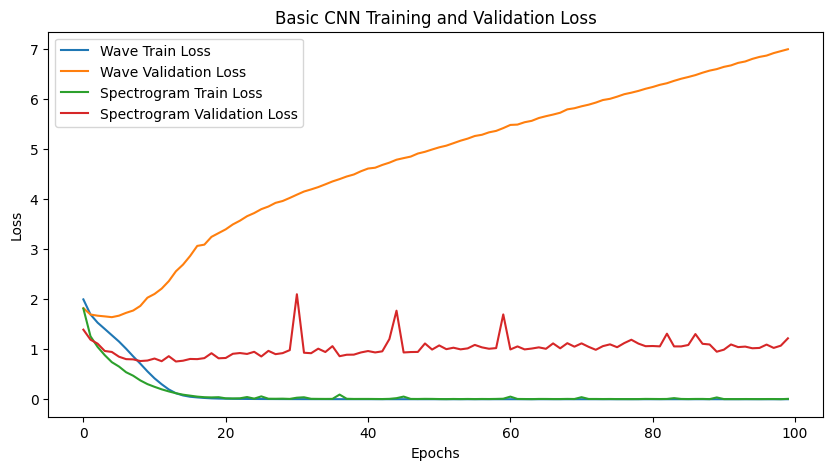

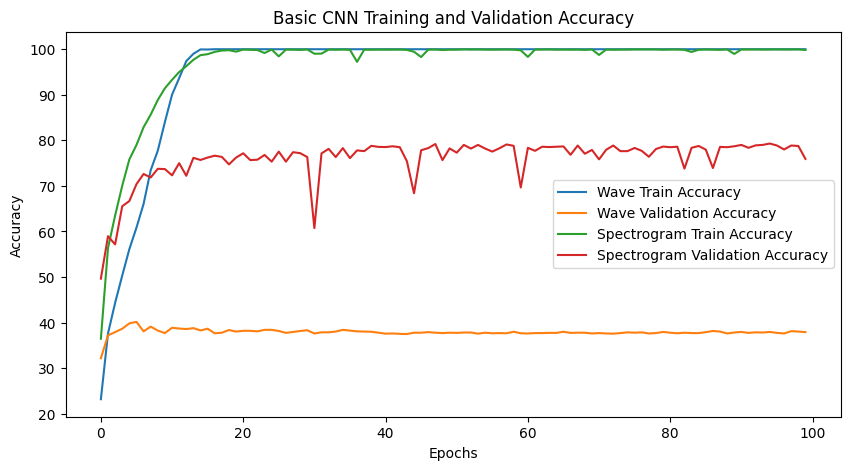

Max Validation Accuracy for Wave: 40.14%
Max Validation Accuracy for Spectrogram: 79.29%


In [27]:
import matplotlib.pyplot as plt
import torch

graph_types = [ 'Wave', 'Spectrogram']
max_val_accuracies = {}

plt.figure(figsize=(10, 5))
for graph_type in graph_types:
    history = torch.load(f'{graph_type}_baseline_history_epoch.pth')

    plt.plot(history['train_loss'], label=f'{graph_type} Train Loss')
    plt.plot(history['val_loss'], label=f'{graph_type} Validation Loss')

plt.title('Basic CNN Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig(f'Basic CNN Training and Validation Loss.png')
plt.show()

plt.figure(figsize=(10, 5))
for graph_type in graph_types:
    history = torch.load(f'{graph_type}_baseline_history_epoch.pth')

    plt.plot(history['train_acc'], label=f'{graph_type} Train Accuracy')
    plt.plot(history['val_acc'], label=f'{graph_type} Validation Accuracy')

    max_val_acc = max(history['val_acc'])
    max_val_accuracies[graph_type] = max_val_acc

plt.title('Basic CNN Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig(f'Basic CNN Training and Validation Accuracy.png')
plt.show()

for graph_type, max_val_acc in max_val_accuracies.items():
    print(f"Max Validation Accuracy for {graph_type}: {max_val_acc:.2f}%")

MobileNetV2 model Transfer Learning

In [ ]:
from torchvision import transforms, models

In [ ]:
class MusicGenreTransferModel(nn.Module):
    def __init__(self, num_classes=10):
        super(MusicGenreTransferModel, self).__init__()
        self.mobilenet = models.mobilenet_v2(pretrained=True)
        self.mobilenet.classifier[1] = nn.Linear(self.mobilenet.last_channel, num_classes)

    def forward(self, x):
        x = self.mobilenet(x)
        return x

In [ ]:
if not torch.backends.mps.is_available():
    if not torch.backends.mps.is_built():
        print("MPS not available because the current PyTorch install was not "
              "built with MPS enabled.")
    else:
        print("MPS not available because the current MacOS version is not 12.3+ "
              "and/or you do not have an MPS-enabled device on this machine.")

else:
    device = torch.device("mps")

In [ ]:
model = MusicGenreTransferModel().to(device)

# Freeze the pre-trained layers
for param in model.mobilenet.features.parameters():
    param.requires_grad = False

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

test_dataset = MusicGenreDataset(test, transform)
train_dataset = MusicGenreDataset(train, transform)
val_dataset = MusicGenreDataset(val, transform)

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

In [ ]:
# Training loop
num_epochs = 150
train_losses = []
val_losses = []
train_acc = []
val_acc = []

for epoch in range(num_epochs):
    model.train()
    total_train_loss = 0
    total_val_loss = 0
    correct_train = 0
    total_train = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_loss = total_train_loss / len(train_loader)
    train_accuracy = 100 * correct_train / total_train
    train_losses.append(train_loss)
    train_acc.append(train_accuracy)

    model.eval()
    total_val_loss = 0.0
    correct_val = 0
    total_val = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            total_val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()


    val_loss = total_val_loss / len(val_loader)
    val_accuracy = 100 * correct_val / total_val
    val_losses.append(val_loss)
    val_acc.append(val_accuracy)

    print(f'Epoch [{epoch + 1}/{num_epochs}] - Train Loss: {train_loss:.4f} - Train Acc: {train_accuracy:.2f}% - Val Loss: {val_loss:.4f} - Val Acc: {val_accuracy:.2f}%')

    # Save the model's weights every 30 epochs
    if (epoch + 1) % 30 == 0:
        checkpoint_name = f'model_transfer_checkpoint_epoch{epoch + 1}.pth'
        torch.save(model.cpu().state_dict(), checkpoint_name)
        model.to(device)  # Move the model back to the GPU


torch.save(model.state_dict(), 'wave_model_transfer_learning.pth')
# Save training history
history = {'train_loss': train_losses, 'val_loss': val_losses, 'train_acc': train_acc, 'val_acc': val_acc}
torch.save(history, 'wave_model_transfer_learning_history.pth')


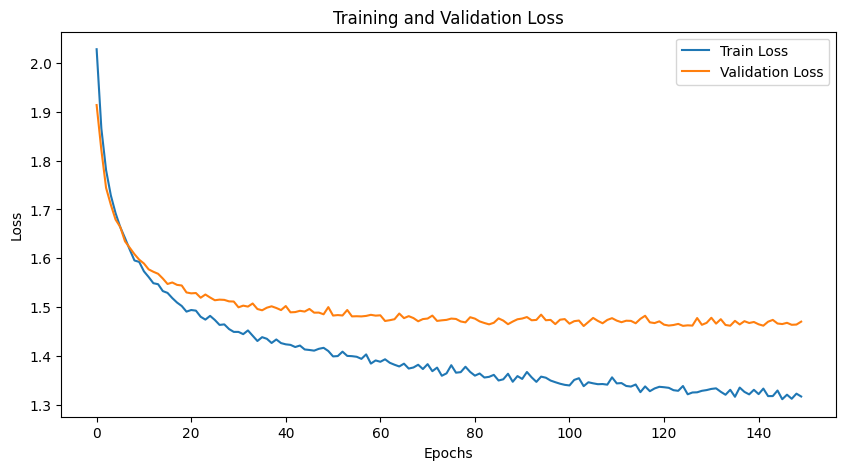

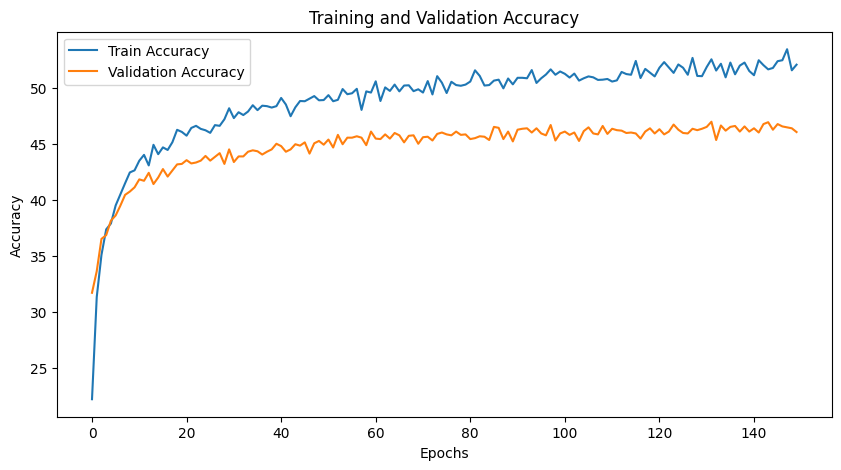

In [28]:
import matplotlib.pyplot as plt
import torch
history = torch.load('wave_model_transfer_learning_history.pth')

plt.figure(figsize=(10, 5))
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('wave_model_transfer_learning_acc_plot.png')
plt.show()


plt.figure(figsize=(10, 5))
plt.plot(history['train_acc'], label='Train Accuracy')
plt.plot(history['val_acc'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('wave_model_transfer_learning_loss_plot.png')
plt.show()

**4 layers CNN with Batch normaliztion and dropout**

In [13]:
%cd /content/drive/MyDrive/cs682_final_genre_classification


/content/drive/MyDrive/cs682_final_genre_classification


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class MusicGenreBatchNormModel(nn.Module):
    def __init__(self, input_shape):
        super(MusicGenreBatchNormModel, self).__init__()

        self.conv1 = nn.Conv2d(input_shape[0], 64, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(64)
        self.pool1 = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)

        self.conv2 = nn.Conv2d(64, 32, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(32)
        self.pool2 = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)

        self.conv3 = nn.Conv2d(32, 32, kernel_size=2, padding=1)
        self.bn3 = nn.BatchNorm2d(32)
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2, padding=1)

        self.conv4 = nn.Conv2d(32, 16, kernel_size=1, padding=1)
        self.bn4 = nn.BatchNorm2d(16)
        self.pool4 = nn.MaxPool2d(kernel_size=1, stride=2, padding=0)

        # Calculate the flattened size after the conv and pooling layers
        self.flattened_size = self._get_conv_output(input_shape)

        self.fc1 = nn.Linear(self.flattened_size, 64)
        self.dropout = nn.Dropout(0.3)
        self.fc2 = nn.Linear(64, 10)


    def _get_conv_output(self, shape):
        with torch.no_grad():
            input = torch.rand(1, *shape)
            output = self._forward_features(input)
            return int(np.prod(output.size()))  # Use np.prod to get the product of all dimensions

    def _forward_features(self, x):
        x = self.pool1(F.relu(self.bn1(self.conv1(x))))
        x = self.pool2(F.relu(self.bn2(self.conv2(x))))
        x = self.pool3(F.relu(self.bn3(self.conv3(x))))
        x = self.pool4(F.relu(self.bn4(self.conv4(x))))
        return x

    def forward(self, x):
        x = self._forward_features(x)
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

In [ ]:
IMG_HEIGHT, IMG_WIDTH = 256, 256
for data_dir in ['Data/spectromgram/', 'Data/chroma/', 'Data/wave/']:
    graph_type = data_dir.split('/')[-2]
    print(graph_type)
    image_paths = get_png_file_paths(data_dir)
    train, val, test = split_dataset(image_paths)

    transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

    test_dataset = MusicGenreDataset(test, transform)
    train_dataset = MusicGenreDataset(train, transform)
    val_dataset = MusicGenreDataset(val, transform)

    batch_size = 32
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

    # Create an instance of the model (same as before)
    model = MusicGenreBatchNormModel((3, IMG_HEIGHT, IMG_WIDTH)).to(device)


    # Define the loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.0001)

    # Training loop
    num_epochs = 100
    train_losses = []
    val_losses = []
    train_acc = []
    val_acc = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()
            running_loss += loss.item()

        train_loss = running_loss / len(train_loader)
        train_accuracy = 100 * correct_train / total_train
        train_losses.append(train_loss)
        train_acc.append(train_accuracy)

        # Validation loop
        model.eval()
        running_loss = 0.0
        correct_val = 0
        total_val = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                _, predicted = torch.max(outputs.data, 1)
                total_val += labels.size(0)
                correct_val += (predicted == labels).sum().item()
                running_loss += loss.item()

        val_loss = running_loss / len(val_loader)
        val_accuracy = 100 * correct_val / total_val
        val_losses.append(val_loss)
        val_acc.append(val_accuracy)

        print(f'{graph_type} Epoch [{epoch + 1}/{num_epochs}] - Train Loss: {train_loss:.4f} - Train Acc: {train_accuracy:.2f}% - Val Loss: {val_loss:.4f} - Val Acc: {val_accuracy:.2f}%')

        # Save the model's weights every 30 epochs
        if (epoch + 1) % 30 == 0:
            checkpoint_name = f'model_checkpoint_epoch{epoch + 1}{graph_type}.pth'
            torch.save(model.cpu().state_dict(), checkpoint_name)
            model.to(device)  # Move the model back to the GPU

    # Save the model's weights
    torch.save(model.state_dict(), f'{graph_type}_CNN_Batch_Norm_epoch_.pth')
    # Save training history
    history = {'train_loss': train_losses, 'val_loss': val_losses, 'train_acc': train_acc, 'val_acc': val_acc}

    torch.save(history, f'history_{graph_type}_CNN_Batch_Norm_epoch.pth')


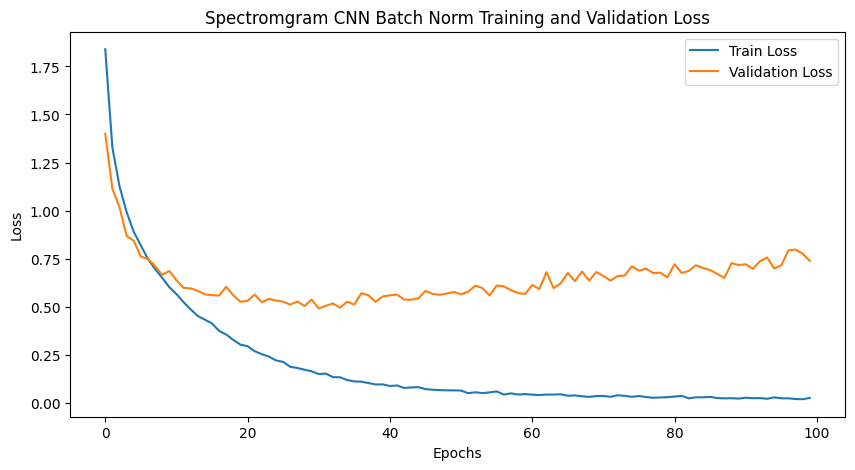

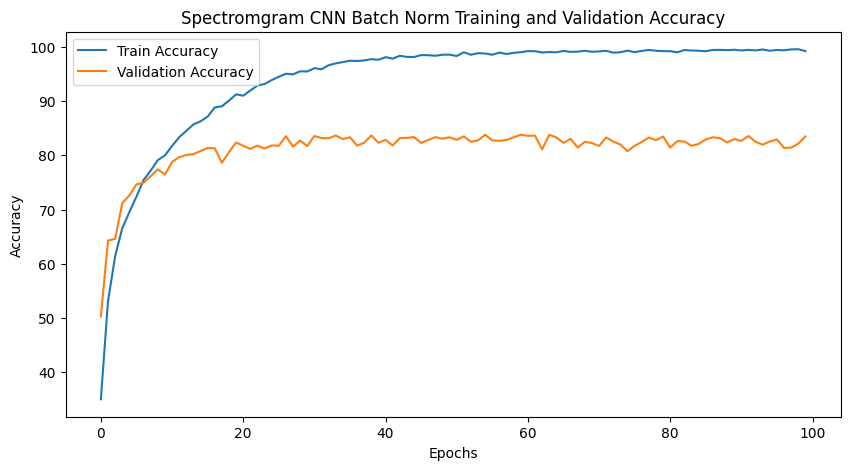

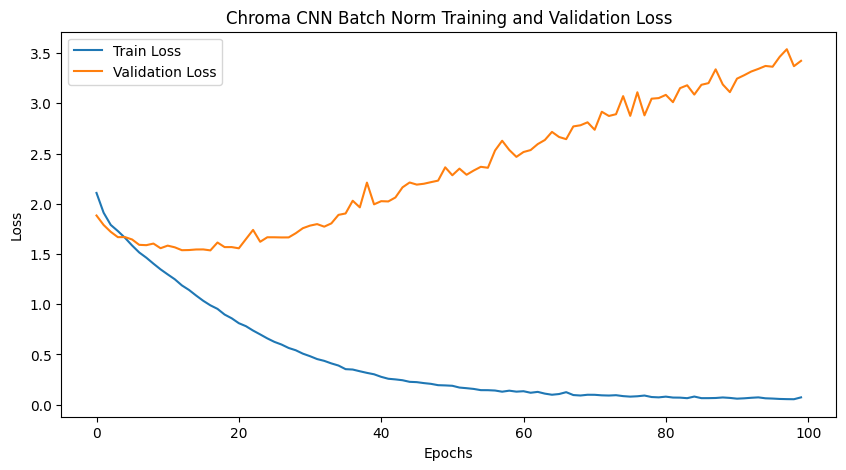

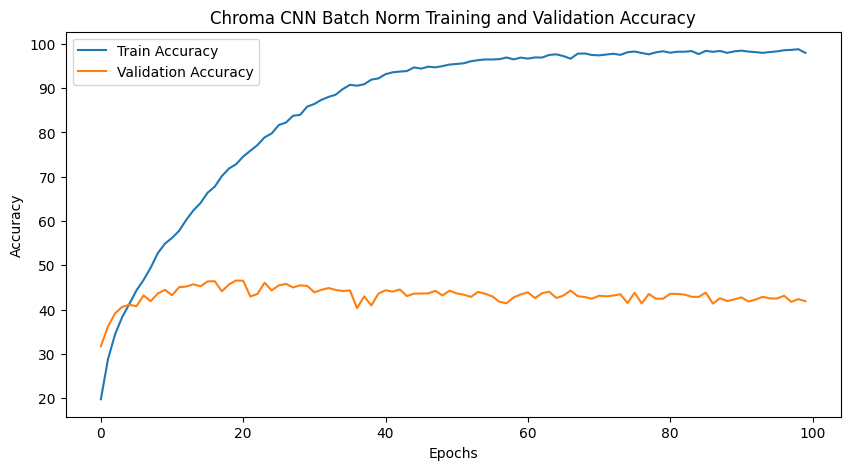

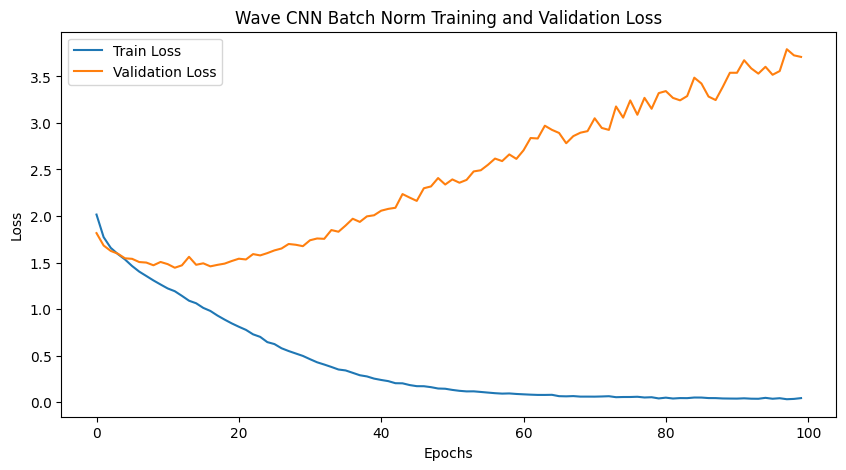

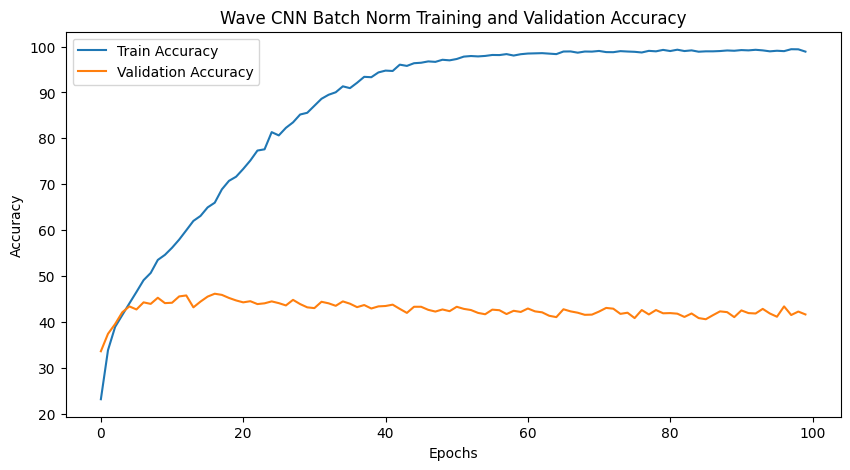

Max Validation Accuracy for Spectromgram: 83.80%
Max Validation Accuracy for Chroma: 46.59%
Max Validation Accuracy for Wave: 46.16%


In [14]:
max_val_accuracies = {}

for graph_type in ['Spectromgram', 'Chroma', 'Wave']:
    history = torch.load(f'history_{graph_type}_CNN_Batch_Norm_epoch.pth')

    plt.figure(figsize=(10, 5))
    plt.plot(history['train_loss'], label='Train Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.title(f'{graph_type} CNN Batch Norm Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    plt.figure(figsize=(10, 5))
    plt.plot(history['train_acc'], label='Train Accuracy')
    plt.plot(history['val_acc'], label='Validation Accuracy')
    plt.title(f'{graph_type} CNN Batch Norm Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    max_val_acc = max(history['val_acc'])
    max_val_accuracies[graph_type] = max_val_acc

for graph_type, max_val_acc in max_val_accuracies.items():
    print(f"Max Validation Accuracy for {graph_type}: {max_val_acc:.2f}%")

In [19]:
!pwd

/content/drive/MyDrive/cs682_final_genre_classification


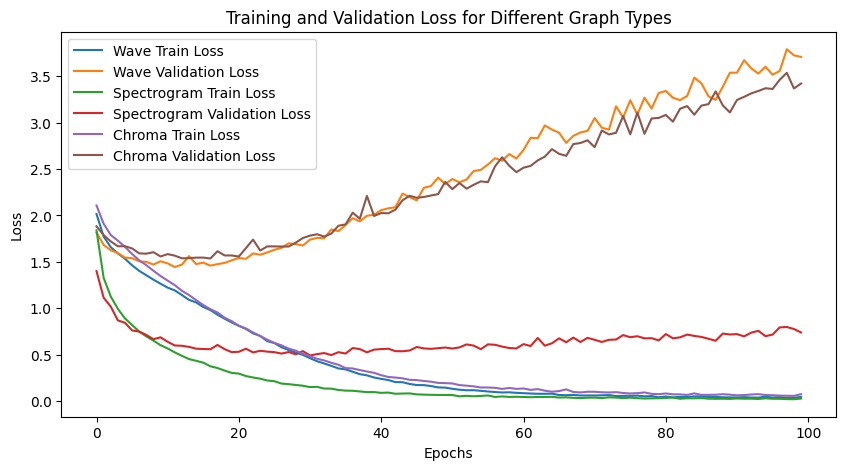

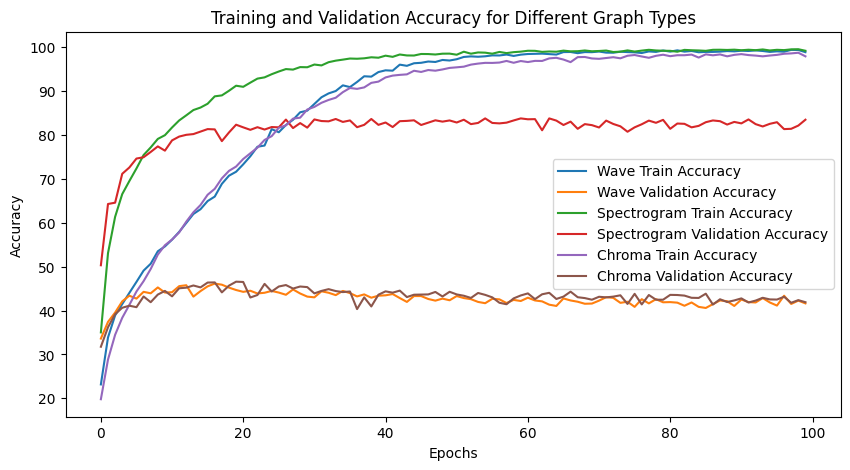

Max Validation Accuracy for Wave: 46.16%
Max Validation Accuracy for Spectrogram: 83.80%
Max Validation Accuracy for Chroma: 46.59%


In [23]:
import matplotlib.pyplot as plt
import torch

graph_types = [ 'Wave', 'Spectrogram', 'Chroma',]
max_val_accuracies = {}

plt.figure(figsize=(10, 5))
for graph_type in graph_types:
    history = torch.load(f'history_{graph_type}_CNN_Batch_Norm_epoch.pth')

    plt.plot(history['train_loss'], label=f'{graph_type} Train Loss')
    plt.plot(history['val_loss'], label=f'{graph_type} Validation Loss')

plt.title('Training and Validation Loss for Different Graph Types')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig(f'Batch Normalization CNN Training and Validation Loss.png')
plt.show()

plt.figure(figsize=(10, 5))
for graph_type in graph_types:
    history = torch.load(f'history_{graph_type}_CNN_Batch_Norm_epoch.pth')

    plt.plot(history['train_acc'], label=f'{graph_type} Train Accuracy')
    plt.plot(history['val_acc'], label=f'{graph_type} Validation Accuracy')

    max_val_acc = max(history['val_acc'])
    max_val_accuracies[graph_type] = max_val_acc

plt.title('Training and Validation Accuracy for Different Graph Types')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig(f'Batch Normalization CNN Training and Validation Accuracy.png')
plt.show()

for graph_type, max_val_acc in max_val_accuracies.items():
    print(f"Max Validation Accuracy for {graph_type}: {max_val_acc:.2f}%")